# My Year in Movies (from Letterboxd)

This notebook contains some statistics on the movies in watched in 2016 based on my [Letterboxd diary](https://letterboxd.com/jukeboxhero/)

In [3]:
#import moduls we need
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
#read in the data
data = pd.read_csv('diary.csv')
data.columns = ['old_date', 'Name', 'Year', 'URL', 'Rating', 'Tags','date']

data = data.drop(["old_date"], axis=1)
data = data.drop(["URL"], axis=1)
data = data.drop(["Tags"], axis=1)

#correct date
from datetime import datetime

first_date = data.date.values[0]
datetime.strptime(first_date, "%Y-%m-%d")

data.date = data.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
data.index = data.date

#count number of films
data['number'] = range(1, len(data) + 1)
data.columns

Index(['Name', 'Year', 'Rating', 'date', 'number'], dtype='object')

## Rating distribution of the films watched in 2016

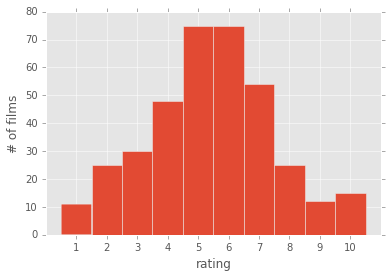

In [5]:
#plot as histogram of the rating

x = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
labels = ['1','2','3','4','5','6','7','8','9','10']

bins = [0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25]

data.Rating.hist(bins=bins)
plt.xlabel('rating')
plt.ylabel('# of films')
plt.xticks(x, labels, rotation=0)
plt.xlim([0,5.5])
plt.show()

## Number of films watched during the year

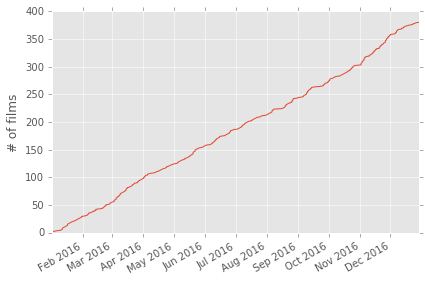

In [6]:
#plot the number of watched films

data.number.plot(linewidth=1)
plt.xlabel('')
plt.ylabel('# of films')

plt.tight_layout()
plt.savefig('rating.png',dpi=600)
plt.show()

## Release Year of the movies

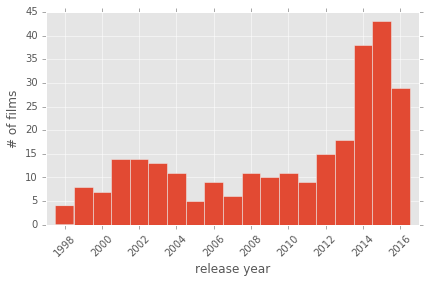

films with release year 2016


Name  Year  Rating       date  \
date                                                                           
2016-02-10                                 Deadpool  2016     4.0 2016-02-10   
2016-03-09                                 Zootopia  2016     4.0 2016-03-09   
2016-03-09                   Darth Maul: Apprentice  2016     NaN 2016-03-09   
2016-03-29       Batman v Superman: Dawn of Justice  2016     3.0 2016-03-29   
2016-04-27               Captain America: Civil War  2016     4.5 2016-04-27   
2016-05-21                        X-Men: Apocalypse  2016     3.0 2016-05-21   
2016-06-01                            The Nice Guys  2016     4.5 2016-06-01   
2016-06-11                              The Do-Over  2016     1.0 2016-06-11   
2016-06-26                                 Deadpool  2016     4.0 2016-06-26   
2016-07-22                                 Zootopia  2016     4.0 2016-07-22   
2016-08-05                         Star Trek Beyond  2016     2.5 2016-08-05   
2016-08-16                            Hail, Caesar!  2016     3.5 2016-08-16   
2016-08-25                          Kung Fu Panda 3  2016     3.0 2016-08-25   
2016-08-31                 Batman: The Killing Joke  2016     3.0 2016-08-31   
2016-09-26                              Zoolander 2  2016     1.5 2016-09-26   
2016-10-17                              Sing Street  2016     4.0 2016-10-17   
2016-10-22                                  Inferno  2016     2.5 2016-10-22   
2016-10-27                           Doctor Strange  2016     3.0 2016-10-27   
2016-11-05                     Central Intelligence  2016     2.5 2016-11-05   
2016-11-06                            The Nice Guys  2016     4.5 2016-11-06   
2016-11-07                            Money Monster  2016     2.5 2016-11-07   
2016-11-15                          The Jungle Book  2016     2.5 2016-11-15   
2016-11-17  Fantastic Beasts and Where to Find Them  2016     3.0 2016-11-17   
2016-11-20                                Allegiant  2016     1.0 2016-11-20   
2016-11-21                          Eddie the Eagle  2016     3.0 2016-11-21   
2016-11-25                                  Arrival  2016     4.0 2016-11-25   
2016-11-30             Sharknado 4: The 4th Awakens  2016     0.5 2016-11-30   
2016-12-09                     Everybody Wants Some  2016     3.5 2016-12-09   
2016-12-15             Rogue One: A Star Wars Story  2016     4.0 2016-12-15   

            number  
date                
2016-02-10      37  
2016-03-09      69  
2016-03-09      70  
2016-03-29      95  
2016-04-27     121  
2016-05-21     146  
2016-06-01     157  
2016-06-11     166  
2016-06-26     183  
2016-07-22     208  
2016-08-05     217  
2016-08-16     224  
2016-08-25     235  
2016-08-31     243  
2016-09-26     267  
2016-10-17     288  
2016-10-22     294  
2016-10-27     302  
2016-11-05     314  
2016-11-06     316  
2016-11-07     318  
2016-11-15     327  
2016-11-17     332  
2016-11-20     335  
2016-11-21     337  
2016-11-25     343  
2016-11-30     356  
2016-12-09     367  
2016-12-15     372

In [7]:
#create a histogram of the release year of the films

bins = [1997.5+i for i in range(20)]
x = [1998+2*i for i in range(10)]
labels = [1998+2*i for i in range(10)]

data.Year.hist(bins=bins)
plt.xlabel('release year')
plt.ylabel('# of films')
plt.xticks(x, labels, rotation=45)
plt.xlim([1997,2017])

plt.tight_layout()
plt.savefig('year.png',dpi=600)

plt.tight_layout()
plt.savefig('movies.png',dpi=600)
plt.show()

print('films with release year 2016')
data[data.Year==2016]


## Number of films watched by week/month/weekday

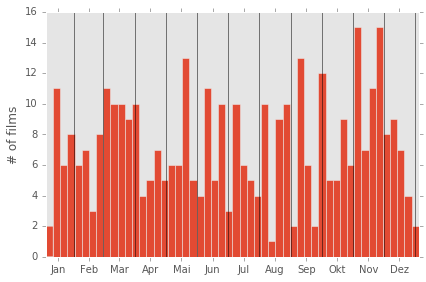

In [8]:
# number of films watched by week

data['week'] = data.date.dt.week

#first plot the week
data.week.replace('53','1')

bins = [i+0.5 for i in range(0,53)]
x = [5*i for i in range(1,11)]
labels = [5*i for i in range(1,11)]

month = [31,29,31,30,31,30,31,31,30,31,30,31]
xnew = [(sum(month[:i])+sum(month[:i+1]))*52/366/2 for i in range(0,12)] 
labels2 = ['Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Dez']

data.week.hist(bins=bins)
for i in range(1,13):
    plt.axvline(sum(month[:i])*52/366, linewidth = 0.5, color='black')
    
plt.ylabel('# of films')
plt.xlim([0.5,52.5])
plt.xticks(xnew, labels2, rotation=0)
plt.grid('off')

plt.tight_layout()
plt.savefig('week.png',dpi=600)
plt.show()


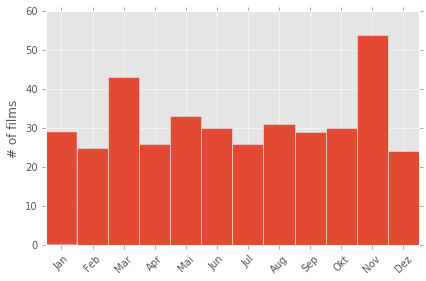

Jan: 29 films watched
Feb: 25 films watched
Mar: 43 films watched
Apr: 26 films watched
Mai: 33 films watched
Jun: 30 films watched
Jul: 26 films watched
Aug: 31 films watched
Sep: 29 films watched
Okt: 30 films watched
Nov: 54 films watched
Dez: 24 films watched


In [9]:
#number of films watched by month

data['month'] = data.date.dt.month

x = [1,2,3,4,5,6,7,8,9,10,11,12]
labels = ['Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Dez']
bins = bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5]


data.month.hist(bins=bins)
plt.ylabel('# of films')
plt.xlim([0.5,12.5])
plt.xticks(x, labels, rotation=45)

plt.tight_layout()
plt.savefig('month.png',dpi=600)
plt.show()

for month in range(1,13):
    count = 0
    for index, row in data.iterrows():
        if str(row.month) == str(month):
            count += 1
    print('{}: {} films watched'.format(labels[month-1],count))

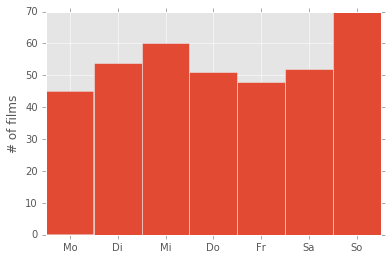

Mo: 45 films watched
Di: 54 films watched
Mi: 60 films watched
Do: 51 films watched
Fr: 48 films watched
Sa: 52 films watched
So: 70 films watched


In [10]:
#films watched by weekday

data['day_of_week'] = data.date.dt.dayofweek

x = [0,1,2,3,4,5,6]
labels = ['Mo','Di','Mi','Do','Fr','Sa','So']

bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]

data.day_of_week.hist(bins=bins)
plt.ylabel('# of films')
plt.xlim([-0.5,6.5])
plt.xticks(x, labels, rotation=0)
plt.savefig('weekday.png',dpi=600)
plt.show()

days = {0:'Mo',1:'Di',2:'Mi',3:'Do',4:'Fr',5:'Sa',6:'So'}
data['day_of_week'] = data['day_of_week'].apply(lambda x: days[x])

for day in range(7):
    count = 0
    for index, row in data.iterrows():
        if str(row.day_of_week) == labels[day]:
            count += 1
    print('{}: {} films watched'.format(labels[day],count))